# Ejemplo de Gráficas con Matplotlib y Seaborn.

Proyecto de generar la solución de un problema de geometría mostrando las gráficas usando matplotlib y seaborn.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Planteamiento del problema
Los vertices de un triángulo son $(2,\ 1)$, $(-4,\ 7)$, $(8,\ 0)$. Hallar para cada una de las medianas, el punto de trisección más cercano al punto medio del lado correspondiente. Demostrar que este punto es el mismo para cada una de las medianas y, por tanto que las medianas concurren en un punto. Ese punto se llama _baricentro_ del triángulo.

In [18]:
# Vertices de un triángulo
vertices = [(2,-1),(-4,7),(8,0)]

Podemos generar la gráfica del triangulo usando $sns.lineplot(x=[x_1,\ x_2],y=[y_1,\ y_2],\ marker=\ 'o')$ para generar los segmentos de cada lado con su marcador en cada punto de los vertices.

El siguiente código también puede graficar un polígono que genera una lista mas grande de puntos.

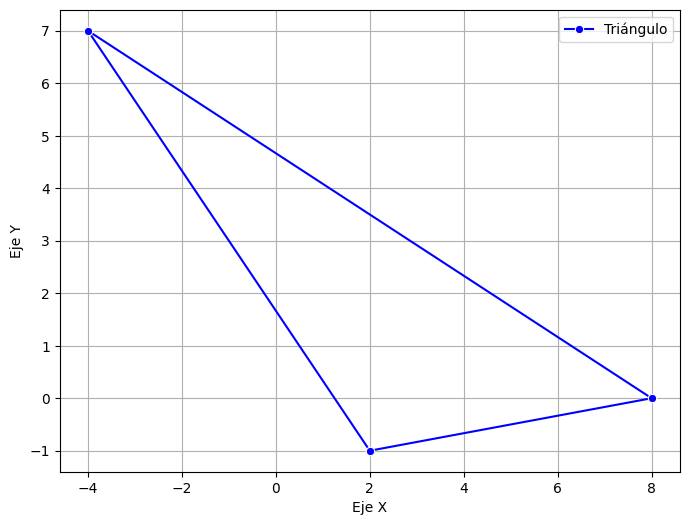

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_zorder(10)

for i in range(len(vertices)): # i recorre cada punto
    j = i+1 # la variable j sirve para recorrer al siguiente punto en .lineplot()
    if i == len(vertices)-1:
        j = 0
    if i == 0:
        etiqueta = 'Triángulo'
    else: etiqueta = ''
    sns.lineplot(x=[vertices[i][0],vertices[j][0]],y=[vertices[i][1],vertices[j][1]],color='b',marker='o',zorder=4, label=f'{etiqueta}')

ax.legend(loc='upper right')

# Configurar títulos y etiquetas
plt.title('')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar la gráfica
plt.grid()
plt.show()

## Puntos medios
Para obtener los puntos medios podemos generar una función:

In [20]:
segmento = [(-1,-1),(3,4)]

def punto_medio(lista: list):
    puntos = []
    # para obtener el punto medio de un segmento
    if len(lista) == 2: 
        puntos.append(tuple([(lista[1][0]+lista[0][0])/2,(lista[1][1]+lista[0][1])/2]))
        return puntos
    # para obtener los puntos medios de los lados de un polígono
    else:
        for i in range(len(lista)): 
            j = i+1 # la variable j sirve para recorrer al siguiente punto en la lista
            if i == len(lista)-1:
                j = 0
            x = (lista[j][0]+lista[i][0])/2
            y = (lista[j][1]+lista[i][1])/2
            puntos.append(tuple([x,y]))
        return(puntos)

print(punto_medio(segmento))

[(1.0, 1.5)]


Ahora generamos los puntos medios de los lados del triángulo.

In [21]:
puntos_medios = punto_medio(vertices)
dict_p_m = {coordenada_x:coordenada_y for coordenada_x, coordenada_y in puntos_medios} # crea un diccionario de la lista de puntos medios
print(puntos_medios)

[(-1.0, 3.0), (2.0, 3.5), (5.0, -0.5)]


Agregamos la lista de puntos medios a la gráfica.

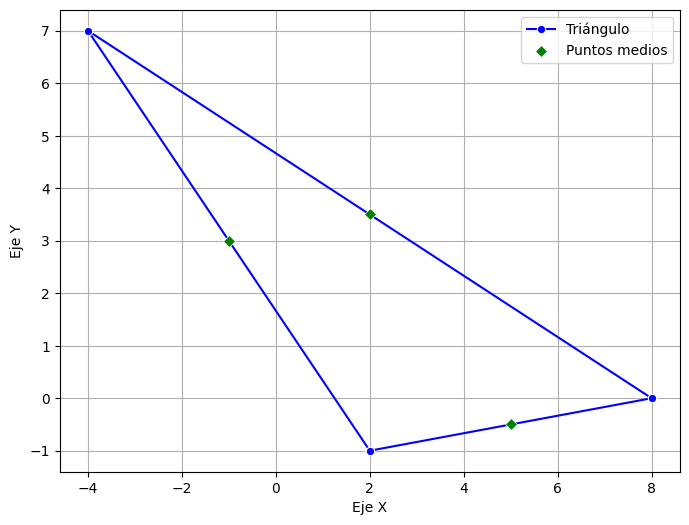

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_zorder(10)

# Gráfica del triángulo
for i in range(len(vertices)): # i recorre cada punto
    j = i+1 # la variable j sirve para recorrer al siguiente punto en .lineplot()
    if i == len(vertices)-1:
        j = 0
    if i == 0:
        etiqueta = 'Triángulo'
    else: etiqueta = ''
    sns.lineplot(x=[vertices[i][0],vertices[j][0]],y=[vertices[i][1],vertices[j][1]],color='b',marker='o',zorder=4, label=f'{etiqueta}')

# Gráfica de los puntos medios
sns.scatterplot(dict_p_m,marker='D',color='g',zorder=5,label='Puntos medios') # En este caso se usó el diccionario para crear la gráfica

ax.legend(loc='upper right')

# Configurar títulos y etiquetas
plt.title('')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar la gráfica
plt.grid()
plt.show()

## Medianas
Para trazar las medianas recorremos puntos medios con los vertices usando $sns.lineplot()$.

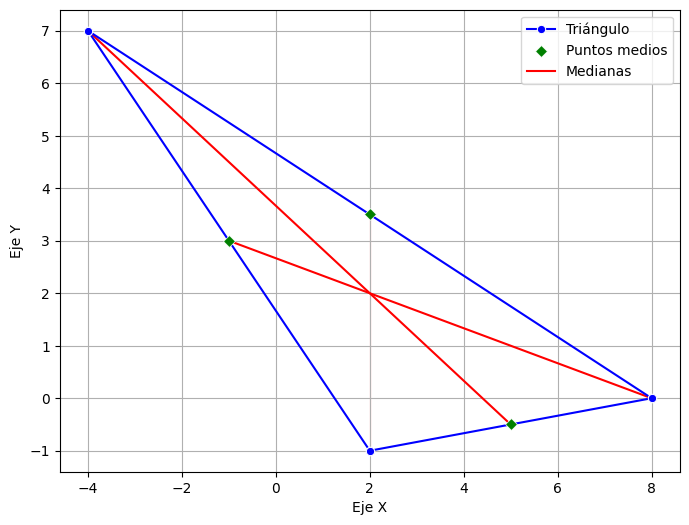

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_zorder(10)

# Gráfica del triángulo
for i in range(len(vertices)): # i recorre cada punto
    j = i+1 # la variable j sirve para recorrer al siguiente punto en .lineplot()
    if i == len(vertices)-1:
        j = 0
    if i == 0:
        etiqueta = 'Triángulo'
    else: etiqueta = ''
    sns.lineplot(x=[vertices[i][0],vertices[j][0]],y=[vertices[i][1],vertices[j][1]],color='b',marker='o',zorder=4, label=f'{etiqueta}')

# Gráfica de los puntos medios
sns.scatterplot(dict_p_m,marker='D',color='g',zorder=5,label='Puntos medios') # En este caso se usó el diccionario para crear la gráfica

# Gráfica de las medianas
for i in range(len(vertices)):
    j = i+1 # la variable j sirve para recorrer al siguiente punto en .lineplot()
    if i == len(vertices)-1:
        j = 0
    if i == 0:
        etiqueta = 'Medianas'
    else: etiqueta = ''
    sns.lineplot(x=[vertices[i][0],puntos_medios[j][0]],y=[vertices[i][1],puntos_medios[j][1]],color='r',zorder=(1+i),label=f'{etiqueta}')

ax.legend(loc='upper right')

# Configurar títulos y etiquetas
plt.title('')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar la gráfica
plt.grid()
plt.show()

## Trisección del segmento
Creamos una función para calcular la trisección del segmento

In [24]:
segmento = [(-1,-1),(3,6)]

def triseccion(lista: list):
    puntos = []
    # para obtener el punto de trisección de un segmento
    if len(lista) == 2:
        puntos.append(tuple([(2*lista[1][0]+lista[0][0])/3,(2*lista[1][1]+lista[0][1])/3]))
        return puntos
    # para obtener el punto de trisección de los lados de un polígono
    else:
        for i in range(len(lista)):
            j = i+1 # la variable j sirve para recorrer al siguiente punto en .lineplot()
            if i == len(lista)-1:
                j = 0
            x = (2*lista[j][0]+lista[i][0])/3
            y = (2*lista[j][1]+lista[i][1])/3
            puntos.append(tuple([x,y]))
        return(puntos)

print(triseccion(segmento))

[(1.6666666666666667, 3.6666666666666665)]


Los puntos de trisección son: 
[(2.0, 2.0)]
[(2.0, 2.0)]
[(2.0, 2.0)]


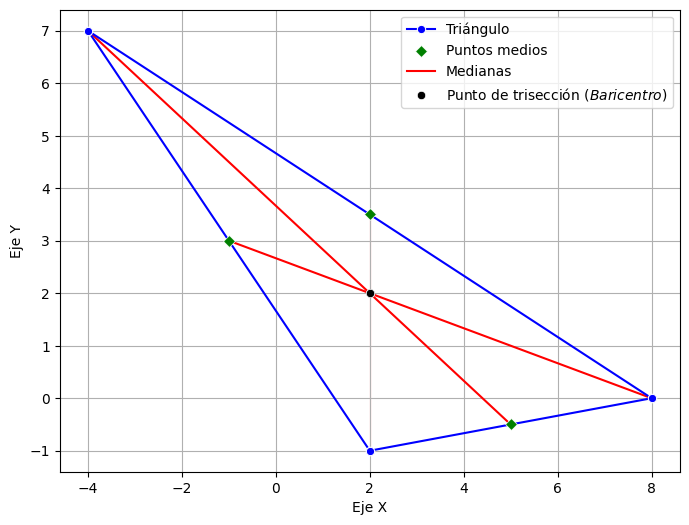

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_zorder(10)

# Gráfica del triángulo
for i in range(len(vertices)): # i recorre cada punto
    j = i+1 # la variable j sirve para recorrer al siguiente punto en .lineplot()
    if i == len(vertices)-1:
        j = 0
    if i == 0:
        etiqueta = 'Triángulo'
    else: etiqueta = ''
    sns.lineplot(x=[vertices[i][0],vertices[j][0]],y=[vertices[i][1],vertices[j][1]],color='b',marker='o',zorder=4, label=f'{etiqueta}')

# Gráfica de los puntos medios
sns.scatterplot(dict_p_m,marker='D',color='g',zorder=5,label='Puntos medios') # En este caso se usó el diccionario para crear la gráfica

# Gráfica de las medianas
for i in range(len(vertices)):
    j = i+1 # la variable j sirve para recorrer al siguiente punto en .lineplot()
    if i == len(vertices)-1:
        j = 0
    if i == 0:
        etiqueta = 'Medianas'
    else: etiqueta = ''
    sns.lineplot(x=[vertices[i][0],puntos_medios[j][0]],y=[vertices[i][1],puntos_medios[j][1]],color='r',zorder=(1+i),label=f'{etiqueta}')

# Gráfica de los puntos de trisección
print('Los puntos de trisección son: ')
for i in range(len(vertices)):
    j = i+1 # la variable j sirve para recorrer al siguiente punto en .lineplot()
    if i == len(vertices)-1:
        j = 0
    segmento = [vertices[i],puntos_medios[j]]
    tercera_parte = triseccion(segmento)
    print(tercera_parte)
    dict_t_p = {clave:valor for clave, valor in tercera_parte}
    if i == 0:
        etiqueta = 'Punto de trisección ($Baricentro$)'
    else: etiqueta = ''
    sns.scatterplot(dict_t_p,marker='o',color='black',zorder=(5+i),label=f'{etiqueta}')

ax.legend(loc='upper right')

# Configurar títulos y etiquetas
plt.title('')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar la gráfica
plt.grid()
plt.show()

Este algoritmo vale para cualquier triángulo o incluso para una serie de puntos más grande, aunque la propiedad del punto de trisección es propia del triángulo y por esa razón si tenemos más puntos no obtendríamos el baricentro del polígono.

Se creará una función que sintetice el código anterior.

In [26]:
def poligono(vertices:list):
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.set_zorder(10)

    # Gráfica del triángulo
    trazo = {2:'Segmento',3:'Triangulo'}
    if len(vertices) >= 4:
        trazo[len(vertices)] = 'Polígono'
    trisec = {2:'Punto de trisección',3:'Punto de trisección ($Baricentro$)'}
    if len(vertices) >= 4:
        trisec[len(vertices)] = 'Puntos de trisección'
    for i in range(len(vertices)): # i recorre cada punto
        j = i+1 # la variable j sirve para recorrer al siguiente punto en .lineplot()
        if i == len(vertices)-1:
            j = 0
        if i == 0:
            etiqueta = trazo[len(vertices)]
        else: etiqueta = ''
        sns.lineplot(x=[vertices[i][0],vertices[j][0]],y=[vertices[i][1],vertices[j][1]],color='b',marker='o',zorder=4, label=f'{etiqueta}')

    # Gráfica de los puntos medios
    puntos_medios = punto_medio(vertices)
    dict_p_m = {coordenada_x:coordenada_y for coordenada_x, coordenada_y in puntos_medios}
    sns.scatterplot(dict_p_m,marker='D',color='g',zorder=5,label='Puntos medios') # En este caso se usó el diccionario para crear la gráfica

    # Gráfica de las medianas
    if len(vertices) >=3:
        for i in range(len(vertices)):
            j = i+1 # la variable j sirve para recorrer al siguiente punto en .lineplot()
            if i == len(vertices)-1:
                j = 0
            if i == 0:
                etiqueta = 'Medianas'
            else: etiqueta = ''
            sns.lineplot(x=[vertices[i][0],puntos_medios[j][0]],y=[vertices[i][1],puntos_medios[j][1]],color='r',zorder=(1+i),label=f'{etiqueta}')

    # Gráfica de los puntos de trisección
    if len(vertices) == 2:
        tercera_parte = triseccion(vertices)
        dict_t_p ={x:y for x,y in tercera_parte}
        sns.scatterplot(dict_t_p,marker='o',color='black',zorder=(5+i),label=trisec[2])
    else:
        print('Los puntos de trisección son: ')
        for i in range(len(vertices)):
            j = i+1 # la variable j sirve para recorrer al siguiente punto en .lineplot()
            if i == len(vertices)-1:
                j = 0
            segmento = [vertices[i],puntos_medios[j]]
            tercera_parte = triseccion(segmento)
            print(tercera_parte)
            dict_t_p = {clave:valor for clave, valor in tercera_parte}
            if i == 0:
                etiqueta = trisec[len(vertices)]
            else: etiqueta = ''
            sns.scatterplot(dict_t_p,marker='o',color='black',zorder=(5+i),label=f'{etiqueta}')

    ax.legend(loc='upper right')

    # Configurar títulos y etiquetas
    plt.title('')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')

    # Mostrar la gráfica
    plt.grid()
    plt.show()

Los puntos de trisección son: 
[(0.0, 0.6666666666666666)]
[(0.0, 0.6666666666666666)]
[(0.0, 0.6666666666666666)]


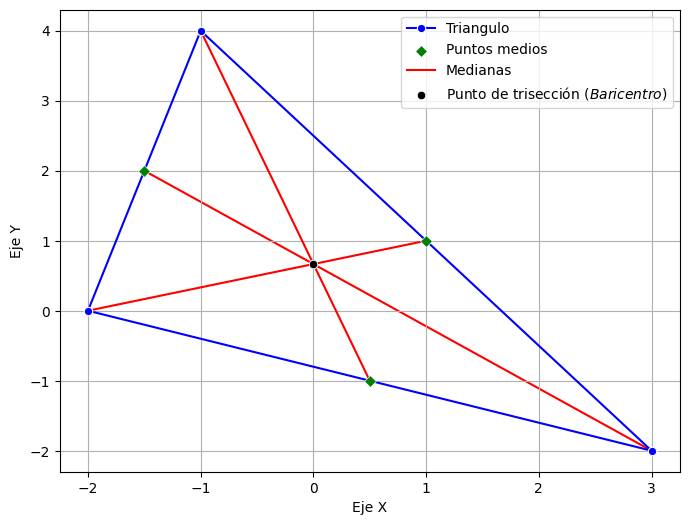

In [27]:
# Otro triangulo
vertices = [(3,-2),(-2,0),(-1,4)]
poligono(vertices)

Los puntos de trisección son: 
[(-0.16666666666666666, 0.6666666666666666)]
[(-2.8333333333333335, -1.0)]
[(-1.1666666666666667, -1.6666666666666667)]
[(-1.3333333333333333, -3.0)]


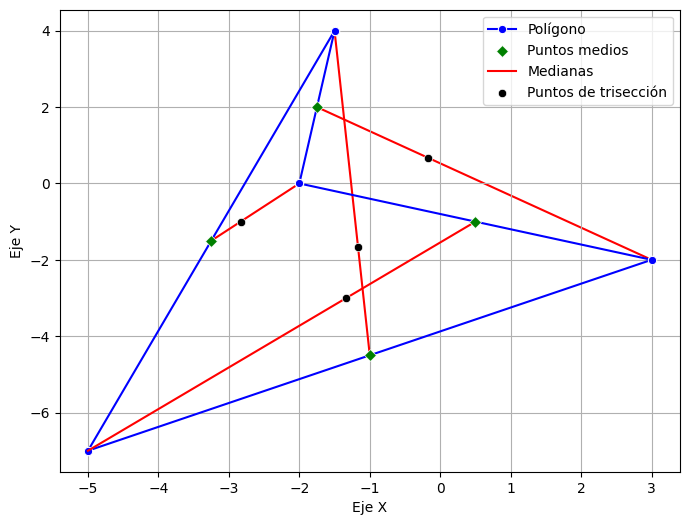

In [28]:
# Polígono
vertices = [(3,-2),(-2,0),(-1.5,4),(-5,-7)]
poligono(vertices)

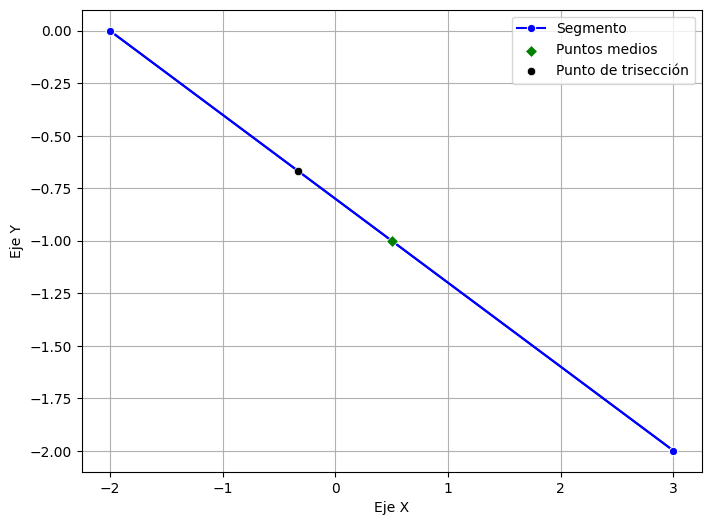

In [29]:
# Segmento
vertices = [(3,-2),(-2,0)]
poligono(vertices)